### Compiled by :
      Alem H Fitwi, 
      PhD Student, ECE (Privacy, ML/DNN, & Chaotic Encryption)
      GA-Data Analystics Specialist,
      Binghamton University-State University of New York
      Since August, 2017 

# <font color = 'green'>Complete SQL Bootcamp</font>

# <font color = 'green'>Section 4: JOINS</font>

https://learnsql.com/blog/sql-joins/

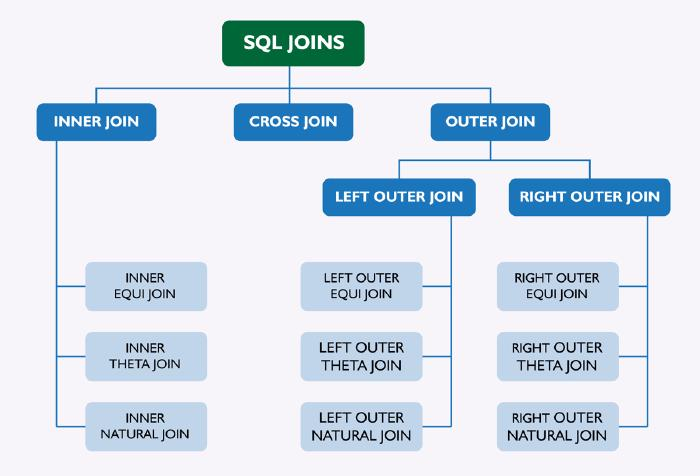

In [25]:
from IPython.display import Image
Image("./0_figs/sqljoins.jpg")

- There are several types of JOINs, in this lecture we willgo through many types of joins. But first we will go through an overview of the AS statement.
- JOINs allow us to combine multiple tables together.
- The main reason for the different JOIN types is to decide how to deal with information only present in one of the joined tables.

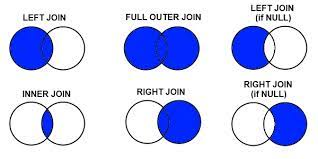

In [18]:
from IPython.display import Image
Image("./0_figs/join.jpeg")

- INNER JOIN
- OUTER [LEFT | RIGHT | FULL] JOIN
- NATURAL JOIN
- CROSS JOIN

#### Tables for Demo

In [6]:
import pandas as pd
TableA = pd.DataFrame({"a_id":[1,2,3,4],
                     "name":['apple','orange','tomato','cucumber']})
TableA

,a_id,name
0,1,apple
1,2,orange
2,3,tomato
3,4,cucumber


In [7]:
TableB = pd.DataFrame({"a_id":['A','B','C','D'],
                     "name":['apple','banana','cucumber', 'dill']})
TableB

,a_id,name
0,A,apple
1,B,banana
2,C,cucumber
3,D,dill


### 4.1 AS Statement

- Before we learn about JOINS, let's quickly cover the AS clause which allows us to create an "alias" for a column or result.
- Let's see the example syntax.
    
      SELECT columns AS new_name
      FROM table
      
      SELECT SUM(column) AS new_name
      FROM table;
      
      SELECT SUM(amount) AS price
      FROM payment;
- The AS operator gets executed at the very end of a query, meaning that we can not use the ALIAS inside a WHERE operator.
- Let's walk through a few examples in pgAdmin!

       SELECT customer_id, SUM(amount) AS total_spent
        FROM payment
        GROUP BY customer_id;
        
        SELECT customer_id, SUM(amount) AS total_spent
        FROM payment
        GROUP BY customer_id
        HAVING SUM(amount) > 100; never use total_spent
     - Aliased name gets assigned only at the end. Never use it anywhere, it will generate errors!


### 4.2 CROSS Join
- A CROSS JOIN is a Cartesian product of TableA and TableB. Every row from TableA is matched with every row from TableB; that's why a CROSS JOIN doesn't make sense in most situations.

        SELECT *
        FROM tableA
        CROSS JOIN tableB;
        
        SELECT * FROM TableA
        CROSS JOIN TableB;

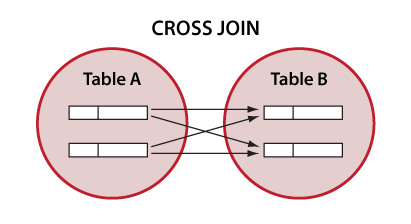

In [1]:
from IPython.display import Image
Image("./0_figs/jcj.png")

### Creating a Query

In [8]:
query = f"""SELECT * FROM TableA 
  CROSS JOIN TableB"""
query

'SELECT * FROM TableA \n  CROSS JOIN TableB'

In [9]:
import pandas as pd
import sqlite3
from sqlalchemy import create_engine
dbpath = "/home/alem/Desktop/alemprojects/FinalNotes/2_DBNotes/3_PostGresDB/PLDB.db"

col = ['a_id', 'name', 'b_id', 'name']
query = f"SELECT * FROM TableA CROSS JOIN TableB"
engine = create_engine('sqlite:///'+dbpath, echo=False)
df1 = pd.DataFrame(engine.execute(query), columns=col)
df1

,a_id,name,b_id,name
0,1,apple,A,apple
1,1,apple,B,banana
2,1,apple,C,cucumber
3,1,apple,D,dill
4,2,orange,A,apple
5,2,orange,B,banana
6,2,orange,C,cucumber
7,2,orange,D,dill
8,3,tomato,A,apple
9,3,tomato,B,banana


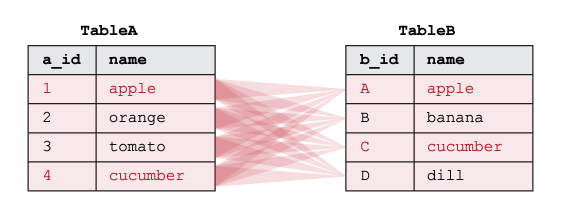

In [35]:
from IPython.display import Image
Image("./0_figs/jcj2.png")

### 4.3 Inner Join
- Intersection of Registration and Login Tables

      SELECT reg_id, Logins.name, log_id
      FROM Registrations
      INNER JOIN Logins
      ON Registrations.cutomer_id = Logins.customer_id;

- Symmetrical: Tables A and B, or conversely
    - Table order doesn't matter
- Also if you see just JOIN without the INNER, PostGreSQL will treat it as an INNER JOIN.
- Let's see some examples in pgAdmin!

      SELECT* 
      FROM TableA
      INNER JOIN TableB
      ON TableA.col_match = TableB.col_match
      
      SELECT* 
      FROM TableB
      INNER JOIN TableA
      ON TableB.col_match = TableA.col_match  
      
      SELECT *
      FROM TableA
      INNER JOIN TableB
      ON TableA.name = TableB.name
      
- Inner join produces only the set of records that match in both Table A and Table B.

In [47]:
col = ['a_id', 'name', 'b_id', 'name']
querry = """SELECT * FROM TableA INNER JOIN TableB
      ON TableA.name = TableB.name"""
engine = create_engine('sqlite:///'+dbpath, echo=False)
df2 = pd.DataFrame(engine.execute(querry), 
                     columns=col)
df2

,a_id,name,b_id,name
0,1,apple,A,apple
1,4,cucumber,C,cucumber


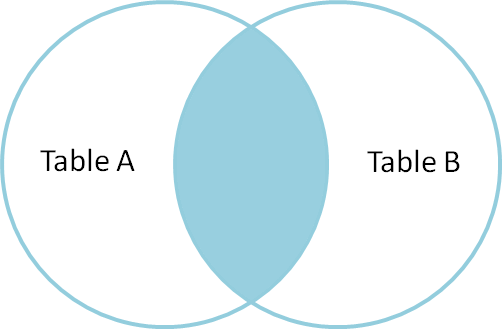

In [6]:
from IPython.display import Image
Image("./0_figs/jin.png")

- Symmetrical venn diagram. INNER JOIN of TableA & TableB = their intersections

        SELECT* 
        FROM customer
        INNER JOIN payment
        ON customer.cutomer_id = payment.customer_id;

### 4.4 Full Outer Joins
- There few different types of OUTER JOINs
- They will allow us to specify how to deal with values only present in one of the tables being joined.
- These are the more complex JOINs, take your time when trying to understand them.
- Full Outer Join: just grabs everything!

        SELECT* 
        FROM TableA
        FULL OUTER JOIN TableB
        ON TableA.col_match = TableB.col_match;
- Symmetrical in that switch the table orders doesn't affect the outcome.
- Full outer join produces the set of all records in Table A and Table B, with matching records from both sides where available. If there is no match, the missing side will contain null.

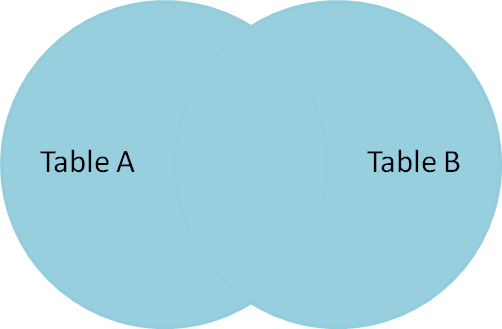

In [1]:
from IPython.display import Image
Image("./0_figs/jun.png")

        SELECT* 
        FROM customer
        FULL OUTER JOIN payment
        ON customer.cutomer_id = payment.customer_id;

- RIGHT and FULL OUTER JOINs are not currently supported

#### Differences
    $A/B cup B/A$

        SELECT* 
        FROM TableA
        FULL OUTER JOIN TableB
        ON TableA.col_match = TableB.col_match
        WHERE TableA.col_match IS null OR
        TableB.col_match IS null;

#### FULL OUTER JOIN IF (null) = FULL OUTER EXCLUDING JOIN

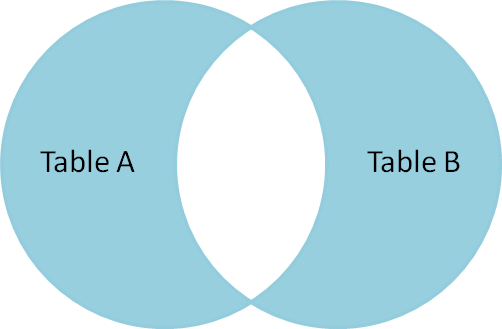

In [10]:
from IPython.display import Image
Image("./0_figs/jwin.png")

To produce the set of records unique to Table A and Table B, we perform the same full outer join, then exclude the records we don't want from both sides via a where clause.

### 4.5 Left Outer Join

- A LEFT OUTER JOIN results in the set of records that are in the left table, if there is no match with the right table, the results are null.
- Later pn we will learn how to add WHERE statements to further modify a LEFT OUTER JOIN.
- LEFT JOIN or LEFT OUTER JOIN
- Not symmetrical; hence, order matters!
- Most complicated JOIN

        SELECT* 
        FROM TableA
        LEFT OUTER JOIN TableB
        ON TableA.col_match = TableB.col_match;
        
        SELECT* 
        FROM film
        LEFT OUTER JOIN inventory
        ON film.film_id = inventory.film_id;
- Everything that belongs to TableA and the intersection of TableA and TableB.
- Left outer join produces a complete set of records from Table A, with the matching records (where available) in Table B. If there is no match, the right side will contain null.

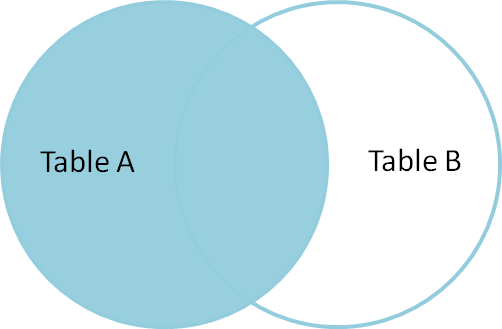

In [15]:
from IPython.display import Image
Image("./0_figs/joa.png")

In [48]:
col = ['a_id', 'name', 'b_id', 'name']
querry = """SELECT * FROM TableA LEFT OUTER JOIN TableB
      ON TableA.name = TableB.name"""
engine = create_engine('sqlite:///'+dbpath, echo=False)
df3 = pd.DataFrame(engine.execute(querry), 
                     columns=col)
df3

,a_id,name,b_id,name
0,1,apple,A,apple
1,2,orange,None,None
2,3,tomato,None,None
3,4,cucumber,C,cucumber


### LEFT OUTER JOIN IF (null)/ LEFT EXCLUDING JOIN

        SELECT* 
        FROM TableA
        LEFT OUTER JOIN TableB
        ON TableA.col_match = TableB.col_match
        WHERE TableB.col_match IS null;       
       
       
        SELECT* 
        FROM film
        LEFT OUTER JOIN inventory
        ON film.film_id = inventory.film_id
         WHERE inventory.film_id IS null;       

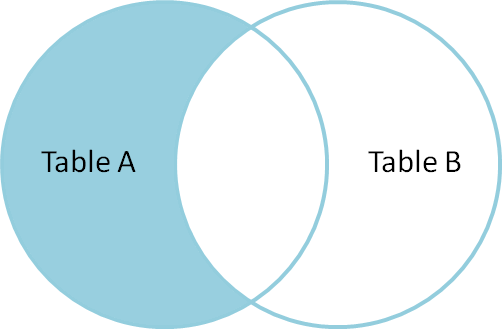

In [14]:
from IPython.display import Image
Image("./0_figs/jawb.png")

In [51]:
col = ['a_id', 'name', 'b_id', 'name']
querry = """SELECT * FROM TableA LEFT OUTER JOIN TableB
      ON TableA.name = TableB.name WHERE TableB.name IS null"""
engine = create_engine('sqlite:///'+dbpath, echo=False)
df4 = pd.DataFrame(engine.execute(querry), 
                     columns=col)
df4

,a_id,name,b_id,name
0,2,orange,None,None
1,3,tomato,None,None


- To produce the set of records only in Table A, but not in Table B, we perform the same left outer join, then exclude the records we don't want from the right side via a where clause.

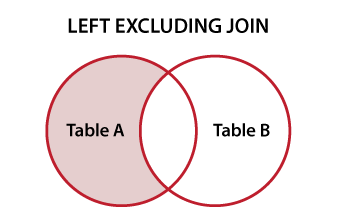

In [23]:
from IPython.display import Image
Image("./0_figs/jlej.png")

### 4.6 Right Joins


- A RIGHT JOIN is essentially the same as a LEFT JOIN, except the tables are switched.
- This would be the same as switching the table order in a LEFT OUTER JOIN.
- Let's quickly see some examples of a RIGHT JOIN.

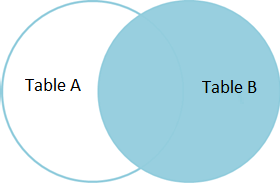

In [21]:
from IPython.display import Image
Image("./0_figs/jrjf.png")


        SELECT* 
        FROM TableA
        RIGHT OUTER JOIN TableB
        ON TableA.col_match = TableB.col_match;  

#### Right Joins IF(null); Right Excluding JOIN

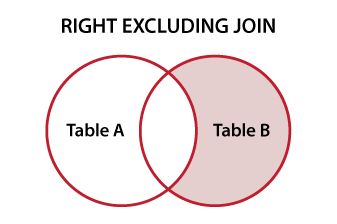

In [22]:
from IPython.display import Image
Image("./0_figs/jrej.png")

        SELECT* 
        FROM TableA
        RIGHT OUTER JOIN TableB
        ON TableA.col_match = TableB.col_match
        WHERE TableA.col_match IS null;

### 4.7 UNION

- The Union operator is used to combine the result-set of two or more SELECT statements.
- It basically serves to directly concatenate two results together, essentially "pasting" them together.
- Stacking tables one over the other

        SELECT a_id FROM TableA
        UNION
        SELECT b_id FROM TableB;

In [56]:
col = ['ID', 'Name']
query = """SELECT * FROM TableA
        UNION
        SELECT * FROM TableB"""
engine = create_engine('sqlite:///'+dbpath, echo=False)
df5 = pd.DataFrame(engine.execute(querry), 
                     columns=col)
df5

,ID,Name
0,1,apple
1,2,orange
2,3,tomato
3,4,cucumber
4,A,apple
5,B,banana
6,C,cucumber
7,D,dill


### 4.8 JOIN Challenge Tasks

1. California sales tax laws have changed and we need to alert our customers to this through email. What are the emails of customers who live in California?

    - Solution: JOIN address and customer tables

        SELECT district, email FROM address
        INNER JOIN customer 
        ON address.address_id = customer.address_id
        WHERE district = 'California';

In [59]:
col = ['district', 'email']
query = """SELECT district, email FROM address
        INNER JOIN customer 
        ON address.address_id = customer.address_id
        WHERE district = 'California';"""
engine = create_engine('sqlite:///'+dbpath, echo=False)
df6 = pd.DataFrame(engine.execute(query), 
                     columns=col)
df6

,district,email
0,California,patricia.johnson@sakilacustomer.org
1,California,betty.white@sakilacustomer.org
2,California,alice.stewart@sakilacustomer.org
3,California,rosa.reynolds@sakilacustomer.org
4,California,renee.lane@sakilacustomer.org
5,California,kristin.johnston@sakilacustomer.org
6,California,cassandra.walters@sakilacustomer.org
7,California,jacob.lance@sakilacustomer.org
8,California,rene.mcalister@sakilacustomer.org


2. A customer walks in and is a huge fan of the actor "Nick Wahlberg" and wants to know which movies he is in. Get a list of all th emovies "Nick Wahlberg" has been in.
    - Solution: actor, film_actor and film
    
            SELECT film.title, actor.Fname, actor.Lname
            FROM actor
            INNER JOIN film_actor
            ON actor.actor_id = film_actor.actor_id
            INNER JOIN film
            ON film.film_id = film_actor.film_id
            WHERE actor.Fname = 'Nick' AND actor.Lname =  'Wahlberg';

In [60]:
col = ['title', 'Fname', 'Lname']
query = """ SELECT film.title, actor.Fname, actor.Lname
            FROM actor
            INNER JOIN film_actor
            ON actor.actor_id = film_actor.actor_id
            INNER JOIN film
            ON film.film_id = film_actor.film_id
            WHERE actor.Fname = 'Nick' AND actor.Lname =  'Wahlberg';"""
engine = create_engine('sqlite:///'+dbpath, echo=False)
df7 = pd.DataFrame(engine.execute(query), 
                     columns=col)
df7

,title,Fname,Lname
0,Adaptation Holes,Nick,Wahlberg
1,Apache Divine,Nick,Wahlberg
2,Baby Hall,Nick,Wahlberg
3,Bull Shawshank,Nick,Wahlberg
4,Chainsaw Uptown,Nick,Wahlberg
5,Chisum Behavior,Nick,Wahlberg
6,Destiny Saturday,Nick,Wahlberg
7,Dracula Crystal,Nick,Wahlberg
8,Fight Jawbreaker,Nick,Wahlberg
9,Flash Wars,Nick,Wahlberg


                                            ~END~